### Predection Fuel Efficiency of Vehicules

1. **Data collection** : we are using the classic Auto MPG dataset from UCI ML Repository
2. **Define Probleme Statement** : We'll frame the problem based on the dataset description and initial exploration
3. **Exploratory Data Analysis** : Carry our exploratory analysis to figure out the importatnt features and creating new combination of features
4. **Data Preparation** : Using step 4, create a pipeline of tasks to transform the data to be loaded into our ML models
5. **Selecting and Training ML models**: Training a few models to evaluate their predictions using cross-validation
6. **Hyperparameter Tuning** : Fine tune the hyperparameters for the models that showed promising results
7. **Deploy the Model using a web service** : Using **Flask web framework** to deploy our training model on Heroku


### Step 1 : Collecting Data from UCI ML repository

In [1]:
import urllib.request
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
filename = 'auto-mpg.data'
urllib.request.urlretrieve(url, filename)

('auto-mpg.data', <http.client.HTTPMessage at 0xf15659a9d0>)

In [2]:
# importing few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
cols = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']
df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?", comment = '\t', sep=" ", skipinitialspace=True)
data = df.copy()

In [4]:
data.sample(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
362,24.2,6,146.0,120.0,2930.0,13.8,81,3
28,9.0,8,304.0,193.0,4732.0,18.5,70,1
162,15.0,6,258.0,110.0,3730.0,19.0,75,1
156,16.0,8,400.0,170.0,4668.0,11.5,75,1
265,17.5,8,318.0,140.0,4080.0,13.7,78,1
167,29.0,4,97.0,75.0,2171.0,16.0,75,3
315,24.3,4,151.0,90.0,3003.0,20.1,80,1
201,18.5,6,250.0,110.0,3645.0,16.2,76,1
313,28.0,4,151.0,90.0,2678.0,16.5,80,1
317,34.3,4,97.0,78.0,2188.0,15.8,80,2


### Problem Statement :
The data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicule in 70s and 80s

Our aim here is to **predict the MPG value for a vehicule** given we have other attribures of that vehicule

### Step 3: Exploratory Data Analysis
1. Check for Data types of columns
2. Check for null values
3. Check for outliers 
4. Look for the category distribution in categorical columns
5. Plot for correlation
6. Look for new variables

In [5]:
## Checking the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
## Checking for all the null values
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
## summary statistics of quantitatives variables
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='horsepower'>

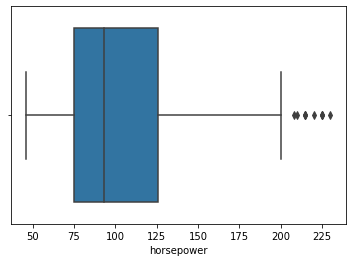

In [8]:
sns.boxplot(x=data['horsepower'])

<AxesSubplot:xlabel='acceleration'>

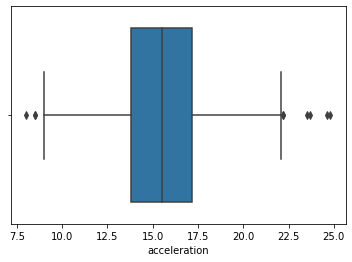

In [9]:
  sns.boxplot(data['acceleration'])

In [10]:
# imputing the values with median
median = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(median)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [12]:
# Category distribution
data['cylinders'].value_counts() / len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

more than 50% of the vehicules have 4 cylinders

In [13]:
data['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

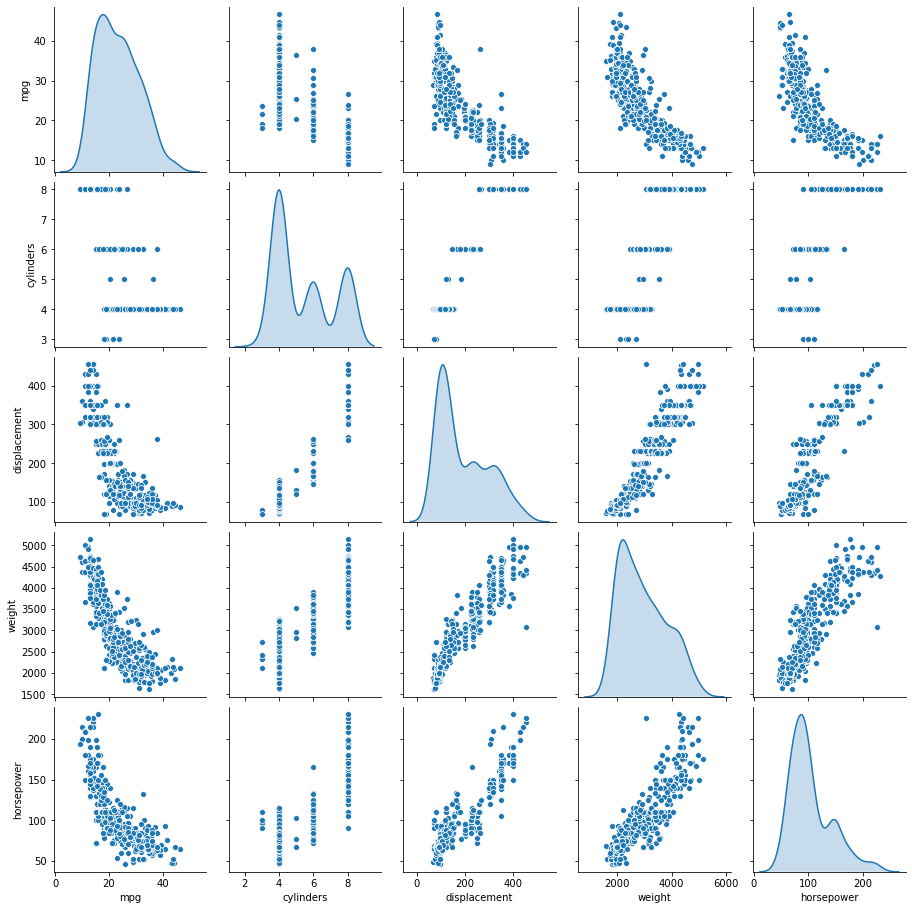

In [14]:
# Pairplots to get an intuition of potential correlations
sns.pairplot(data[["mpg","cylinders", "displacement", "weight", "horsepower"]], diag_kind="kde")

MPG is negatively correlated with displacement, weitht and horsepower

### Stratified Shuffle Split

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Stratification is done based on the cylinders
for train_index, test_index in split.split(data, data["cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

### Segregating Target and Feature variables

In [17]:
data = strat_train_set.drop('mpg', axis=1)
data_labels = strat_train_set['mpg'].copy()
data


,cylinders,displacement,horsepower,weight,acceleration,model year,origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


### Preprocessing the origin column

In [18]:
def preprocessing_origin_cols(df):
    df['origin'] = df['origin'].map({1:"India", 2:"USA", 3:"Germany"})
    return df

data_tr = preprocessing_origin_cols(data)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    318 non-null    float64
 3   weight        318 non-null    float64
 4   acceleration  318 non-null    float64
 5   model year    318 non-null    int64  
 6   origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


### One Hot Encoding   

In [19]:
# isolating the origin column
data_cat = data_tr[['origin']]
data_cat.head()

,origin
145,Germany
151,USA
388,India
48,India
114,USA


In [20]:
# onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot # returns a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [21]:
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

In [23]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
data_cat_bin = lb.fit_transform(data_cat)
data_cat_bin #numpy nd array

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

### Handling Missing values using SimpleImputer

In [24]:
## segregating the numerical columns
num_data = data.iloc[:,:-1]

In [25]:
# handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(strategy='median')

In [26]:
X = imputer.transform(num_data)
X

array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [27]:
# Convert 2D array back to a dataframe
data_tr = pd.DataFrame(X, columns=num_data.columns, index= num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    float64
 1   displacement  318 non-null    float64
 2   horsepower    318 non-null    float64
 3   weight        318 non-null    float64
 4   acceleration  318 non-null    float64
 5   model year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


In [28]:

num_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

### Creating the pipline of tasks

In [30]:
from sklearn.pipeline import Pipeline
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler

numerics = ['float64', 'int64']
num_data = data_tr.select_dtypes(include=numerics)

##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])
num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517])

In [31]:
# Transforming Numerical and Categorical Attributes
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["origin"]

##complete pipeline to transform 
##both numerical and cat. attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517,  1.        ,  0.        ,
        0.        ])

### Selecting and Training Models
1. Select and Train a few algorithms (Linear Regression, Decision Tree, RandomForest)
2. Evaluation using Mean Squared Error
3. Model Evaluation using Cross Validation
4. Hyperparameter Tuning using GridSearchCV
5. Check Feature Importance
6. Evaluate the Final System on test Data
7. Saving the Model

In [32]:
# Importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [33]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [34]:
## Segregate the feature and target variable
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [35]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df


In [36]:
##creating custom attribute adder class
acc_ix, hpower_ix, cyl_ix = 4,2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]

In [37]:
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

### From raw data to processed data in 2 steps

In [38]:
preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

In [39]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

### Selecting and training Models

1. Linear Regression
2. Decision Tree
3. Random Forest
4. SVM regressor

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression()

In [41]:
## Testing the predictions 
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]
sample_data_prepared = pipeline_transformer(sample_data)
print("Prediction of sample", lin_reg.predict(sample_data_prepared))

Prediction of sample [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [42]:
print("Actual labels of samples are", sample_labels)

Actual labels of samples are 145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
Name: MPG, dtype: float64


In [43]:
# Mean Squared Error (if there are lot of qoutliers abslute error is better)
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


2.959040222576087

In [44]:
## Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor()

In [45]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

But no model is perfect, this means that our model has overfit the data to a great extent.

We won't be touching out test data until we finalize our model. So, how do we check for what's happening?

### Model Evaluation using Cross Validation

Scikit-Learn’s K-fold cross-validation feature randomly splits the training set into K distinct subsets called folds, then it trains and evaluates the model K times, picking a different fold for evaluation every time and training on the other K-1 folds.

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [47]:
tree_reg_rmse_scores

array([2.93848388, 2.81169433, 3.0465144 , 3.15074396, 2.33016899,
       3.06808165, 3.47657338, 5.58320584, 4.13002382, 2.59229628])

In [48]:
tree_reg_rmse_scores.mean()

3.31277865327876

In [49]:
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43254597, 3.45157629, 3.6621715 , 2.59652976, 2.48023405,
       2.74798115, 3.32524647, 2.42208917, 3.78133275, 2.8573747 ])

In [50]:
lin_reg_rmse_scores.mean()

3.075708179370932

### Random Forest 

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.5633651296912014

### Support Vector Machine Regressor

In [52]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.08659162080283

### Hyperparameter Tuning using GridSearchCV

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [55]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.4983399801173487 {'max_features': 2, 'n_estimators': 3}
3.0687369210022846 {'max_features': 2, 'n_estimators': 10}
2.9035055753168546 {'max_features': 2, 'n_estimators': 30}
3.1526101790199523 {'max_features': 4, 'n_estimators': 3}
3.0105558309538663 {'max_features': 4, 'n_estimators': 10}
2.760916598470457 {'max_features': 4, 'n_estimators': 30}
3.0644689559659195 {'max_features': 6, 'n_estimators': 3}
2.862667835620608 {'max_features': 6, 'n_estimators': 10}
2.7132606879376495 {'max_features': 6, 'n_estimators': 30}
3.2196930231129857 {'max_features': 8, 'n_estimators': 3}
2.8340509608668514 {'max_features': 8, 'n_estimators': 10}
2.6545075775726614 {'max_features': 8, 'n_estimators': 30}
3.1462416953494774 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9139891198708696 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.4625001940918385 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.885785605076673 {'bootstrap': False, 'max_features': 3, 'n_es

### Checking Feature importance

In [56]:
# Featuren importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.19702492, 0.24605453, 0.13005166, 0.22362195, 0.01229305,
       0.12149939, 0.02748188, 0.03657036, 0.00252275, 0.0017985 ,
       0.001081  ])

In [57]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs

In [58]:
attrs_importance = zip(attrs, feature_importances)
zipped = list(attrs_importance)
res = sorted(zipped, key = lambda x: x[1]) 
print(res)

[('Acceleration', 0.012293046124938648), ('acc_on_power', 0.02748188444571824), ('acc_on_cyl', 0.036570361431276066), ('Model Year', 0.12149938963050512), ('Horsepower', 0.13005166225067144), ('Cylinders', 0.19702492072461367), ('Weight', 0.2236219498294367), ('Displacement', 0.24605452972920136)]


### Evaluating the entire system on Test Data

In [59]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [60]:
final_rmse

3.1187556056507186

### Creating a function to cover this entire flow

In [61]:
def predict_mpg(config, model):
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
        
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [62]:
def predict_mpg(config, model):
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
        
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [68]:
##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}
predict_mpg(vehicle_config, final_model)

array([34.33333333, 17.38666667, 21.61333333])

### Save the Model 

In [69]:
import pickle

In [70]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [71]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([34.33333333, 17.38666667, 21.61333333])

### Deploying the Trained Model¶
1. Start a Flask Project. <br>
2. Set up a dedicated environment with dependencies installed using pip.<br>

Packages to install:<br>

 pandas <br>
 numpy <br>
 sklearn<br>
 flask<br>
 matplotlib<br>
 gunicorn<br>
 seaborn<br>
3. Create a quick flask application to test a simple endpoint.<br>
4. Define a function to that accepts data from the POST request and return the predictions using a helper module.<br>
5. Test the endpoint using requests package <br>

In [ ]:
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}